In [1]:
#library imports

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
activity_labels= ["Lying down","Sitting", "Walking", "Running", "Bicycling", "Sleeping", "Lab work", "In class",
              "In a meeting", "Drive - I'm the driver", "Drive - I'm a passenger", "Exercise", "Cooking",
              "Shopping", "Strolling", "Drinking (alcohol)","Bathing - shower", "Cleaning", "Doing laundry",
              "Washing dishes", "WatchingTV", "Surfing the internet", "Singing", "Talking", "Computer work",
              "Eating", "Toilet", "Grooming", "Dressing", "Stairs - going up", "Stairs - going down", "Standing",
              "With co-workers", "With friends"]


In [19]:
# Get results file for cluster representations

results_overall = json.load(open('../cache/experiments/TAE_Kmeans_10min_extrasensory/results/training_accuracy_overall_20220707_122322.json'))
results_summary = json.load(open('../cache/experiments/TAE_Kmeans_10min_extrasensory/results/training_accuracy_summary_20220707_122322.json'))
results_overall.keys(), results_summary.keys()

(dict_keys(['gt_predicted_contexts', 'gt_context', 'gt_tight_scores', 'gt_spot_scores', 'gt_maj_scores', 'gt_kl_divergence', 'gt_pred_maj_ctx', 'gt_maj_ctx', 'run_config', 'repr_training_metrics', 'context_representations']),
 dict_keys(['gt_overall_tight_accuracy', 'gt_overall_spot_score', 'gt_overall_maj_score', 'gt_average_kl_divergence', 'gt_maj_ctx_confusion_matrix', 'gt_labels_confusion_matrix', 'repr_train_accuracy', 'repr_test_accuracy', 'cluster_labels']))

<AxesSubplot:>

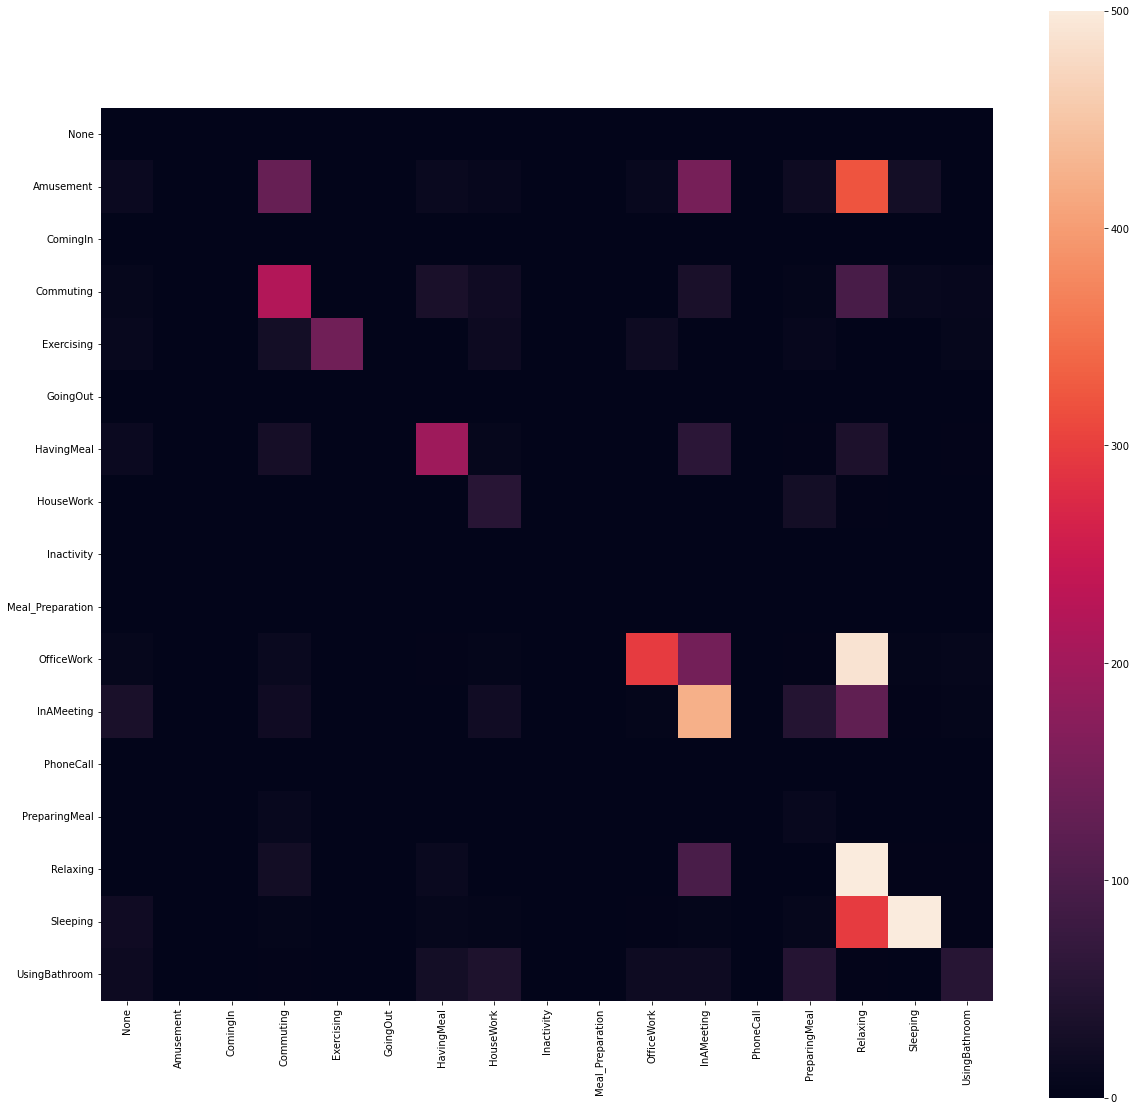

In [20]:
df_gt_conf_mat = pd.DataFrame(results_summary['gt_maj_ctx_confusion_matrix'],index=results_summary['gt_labels_confusion_matrix'],columns=results_summary['gt_labels_confusion_matrix'])
plt.figure(figsize=(20,20))
sns.heatmap(df_gt_conf_mat,square=True,vmax=500)

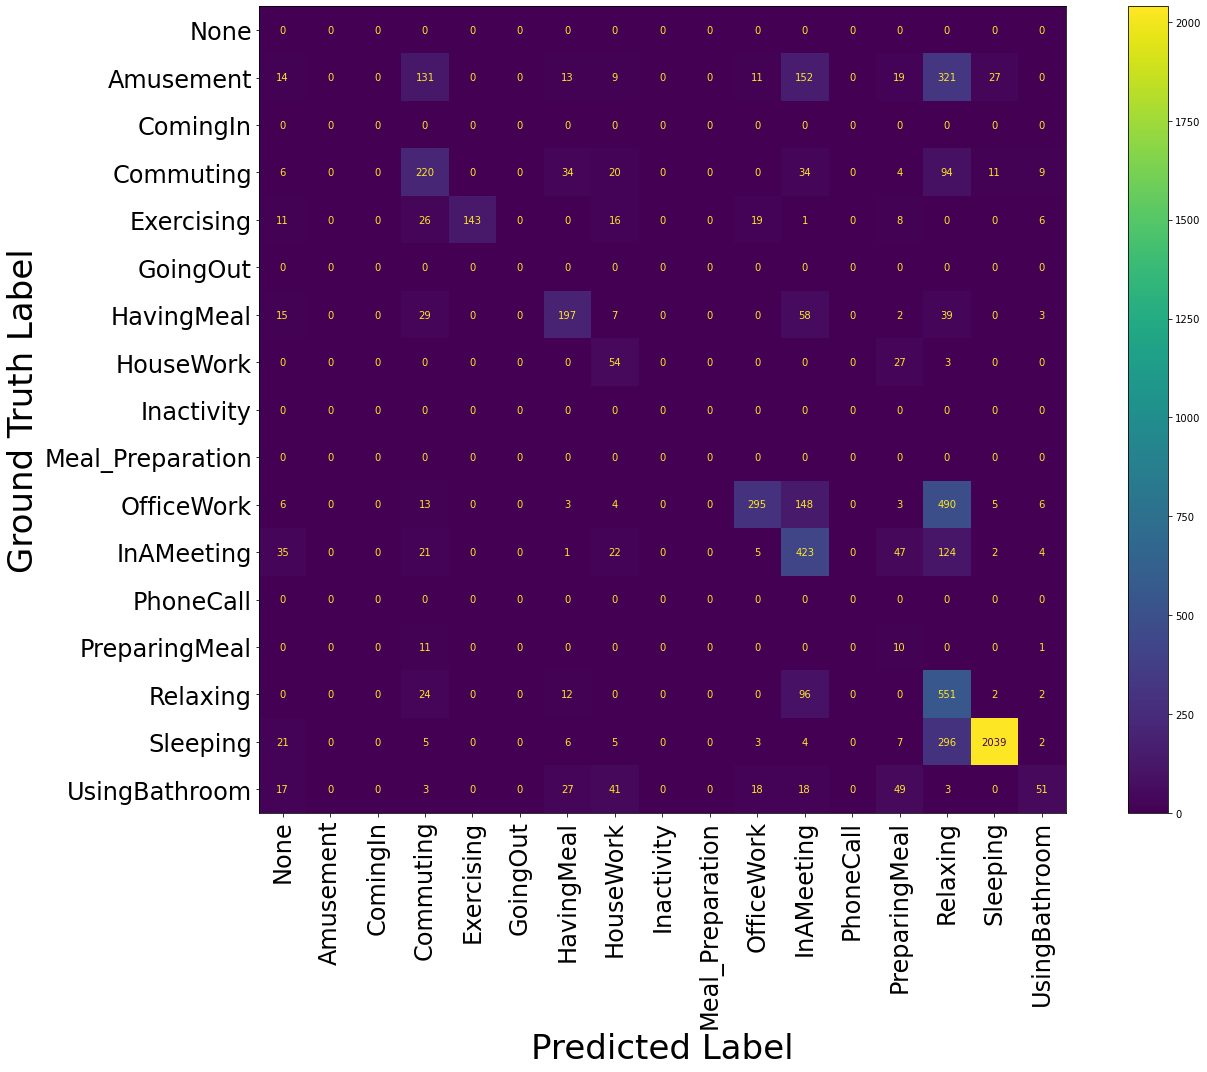

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = np.array(results_summary['gt_maj_ctx_confusion_matrix'])
fig,ax = plt.subplots(1,1,figsize=(20,15))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=results_summary['gt_labels_confusion_matrix'])
disp.plot(xticks_rotation='vertical',ax=ax)
ax.set_xticklabels(results_summary['gt_labels_confusion_matrix'], fontsize= 24)
ax.set_yticklabels(results_summary['gt_labels_confusion_matrix'], fontsize= 24)
ax.set_xlabel('Predicted Label', fontsize= 34)
ax.set_ylabel('Ground Truth Label', fontsize= 34)
plt.tight_layout()
plt.savefig('tmp_confusion_matrix,png',dpi=300)

In [5]:
df_onto_conf_mat = pd.DataFrame(results_summary['onto_maj_ctx_confusion_matrix'],index=results_summary['onto_labels_confusion_matrix'],columns=results_summary['onto_labels_confusion_matrix'])
plt.figure(figsize=(20,20))
sns.heatmap(df_onto_conf_mat,square=True)

KeyError: 'onto_maj_ctx_confusion_matrix'

In [22]:
results_summary

{'gt_overall_tight_accuracy': 55.94921759669324,
 'gt_overall_spot_score': 61.76557425450251,
 'gt_overall_maj_score': 58.79834661942722,
 'gt_average_kl_divergence': 1.8029871118070926,
 'gt_maj_ctx_confusion_matrix': [[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [14, 0, 0, 131, 0, 0, 13, 9, 0, 0, 11, 152, 0, 19, 321, 27, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [6, 0, 0, 220, 0, 0, 34, 20, 0, 0, 0, 34, 0, 4, 94, 11, 9],
  [11, 0, 0, 26, 143, 0, 0, 16, 0, 0, 19, 1, 0, 8, 0, 0, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [15, 0, 0, 29, 0, 0, 197, 7, 0, 0, 0, 58, 0, 2, 39, 0, 3],
  [0, 0, 0, 0, 0, 0, 0, 54, 0, 0, 0, 0, 0, 27, 3, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [6, 0, 0, 13, 0, 0, 3, 4, 0, 0, 295, 148, 0, 3, 490, 5, 6],
  [35, 0, 0, 21, 0, 0, 1, 22, 0, 0, 5, 423, 0, 47, 124, 2, 4],
  [0, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
# get context representations
cluster_centers = np.array(results_overall['cluster_representations'])
cluster_centers.shape

KeyError: 'cluster_representations'